<a href="https://colab.research.google.com/github/preethadk11/AI-PROJECT-major/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
X = df.drop('target', axis=1)
y = df['target']
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = log_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[25  4]
 [ 5 27]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Precision:",precision_score(y_test, y_pred_rf))
print("Recall:",recall_score(y_test, y_pred_rf))
print("F1 Score:",f1_score(y_test, y_pred_rf))

Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384616


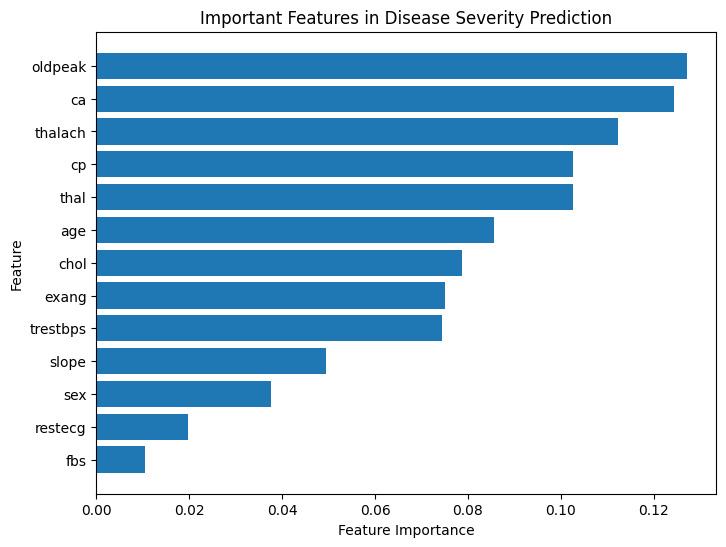

In [12]:
import matplotlib.pyplot as plt
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,6))
plt.barh(np.array(X.columns)[indices],importances[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Important Features in Disease Severity Prediction")
plt.show()

In [14]:
import joblib
joblib.dump(rf, 'heart_disease_model.pkl')
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

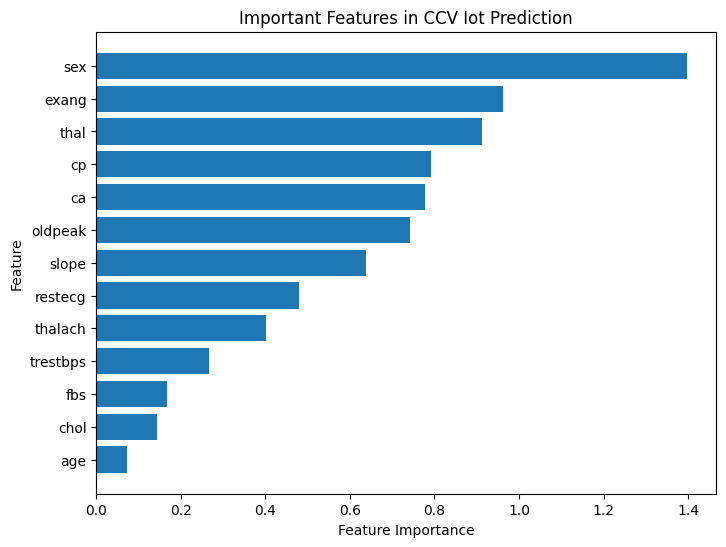

In [16]:
import numpy as np
import matplotlib.pyplot as plt
features = X.columns
importance = np.abs(log_model.coef_[0])
indices = np.argsort(importance)
plt.figure(figsize=(8,6))
plt.barh(np.array(features)[indices],importance[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Important Features in CCV Iot Prediction")
plt.show()

In [18]:
plt.savefig("feature_importance.png")

<Figure size 640x480 with 0 Axes>

**OUTPUT PREDICTION**

In [26]:
import joblib
model = joblib.load('heart_disease_model.pkl')
scaler = joblib.load('scaler.pkl')
import numpy as np
def predict_heart_disease(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
  data = np.array([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
  numeric_indices = [0,3,4,7,9]
  data[:,numeric_indices] = scaler.transform(data[:,numeric_indices])
  prediction = model.predict(data)
  if prediction[0] == 1:
    return "❤️ Disease: YES (high severity)"
  else:
    return "💚 Disease: NO (Low severity)"
result = predict_heart_disease(
    age=52,
    sex=1,
    cp=0,
    trestbps=125,
    chol=212,
    fbs=0,
    restecg=1,
    thalach=168,
    exang=0,
    oldpeak=1.0,
    slope=2,
    ca=2,
    thal=3
)
result


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'💚 Disease: NO (Low severity)'